In [1]:
# Packages used

import numpy as np 
from lmfit import Model
import inspect
import matplotlib.pyplot as plt 
import random


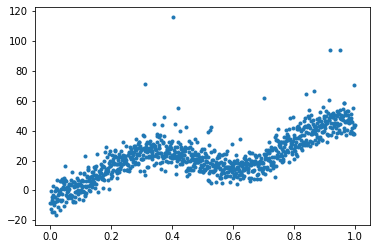

In [2]:
# Data generator

x = np.linspace(0, 1, 1000)

a0 = 4.02
a1 = 31.42
a2 = 11
a3 = 10
a4 = 11


y = [a0 + a1*i + a2 * np.sin(a3*i+a4) for i in x]
y = [i + np.random.normal(0,5) + np.exp(np.random.normal(0,1.3)) for i in y]

plt.plot(x,y, '.',)


In [3]:
# Function used and initial values for the fit

def generic_fun(x, a0, a1, a2, a3, a4):
    return a0 + a1 * x + a2 * np.sin( a3 * x + a4)

i_val = [1, 10, 10, 10, 5]    # Initial parameters in the same order


<ipython-input-4-3016e36e8945>:14: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()
  args = inspect.getargspec(generic_fun).args
Number of iterations:  32


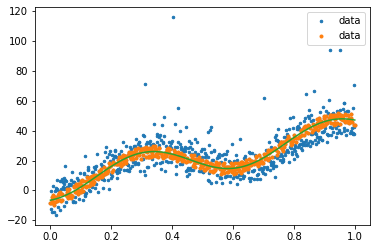

[[Model]]
    Model(generic_fun)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 13
    # data points      = 521
    # variables        = 5
    chi-square         = 2532.70548
    reduced chi-square = 4.90834395
    Akaike info crit   = 833.853824
    Bayesian info crit = 855.132574
[[Variables]]
    a0:  4.04177348 +/- 0.24671793 (6.10%) (init = 4.101234)
    a1:  35.3602622 +/- 0.43332387 (1.23%) (init = 35.26479)
    a2:  10.5771975 +/- 0.13566311 (1.28%) (init = 10.61162)
    a3:  10.1413984 +/- 0.06357052 (0.63%) (init = 10.15112)
    a4:  4.74689037 +/- 0.03377974 (0.71%) (init = 4.739864)
[[Correlations]] (unreported correlations are < 0.100)
    C(a0, a1) = -0.912
    C(a3, a4) = -0.909
    C(a0, a4) = -0.613
    C(a1, a3) = -0.588
    C(a1, a4) =  0.584
    C(a0, a3) =  0.584
    C(a1, a2) = -0.188
    C(a0, a2) =  0.133


In [4]:

# Sigma used for the sigma clipping

nsig = 1.8



####### This part of the code should be the same for everything #######

# Creates model
gmodel = Model(generic_fun)
i_params = gmodel.make_params()

# This part obtains the names of the coefficients
args = inspect.getargspec(generic_fun).args
args.remove('x')

# Setting of the initial values
iv_dict = {}
for i in range(0,len(args)):
    iv_dict[args[i]] = i_val[i]
for p in i_params:
    i_params[p].value = iv_dict[p]



plt.plot(x, y, '.', label='data', markersize=5)

# Model fit

len_valid = 0    # 0 to force the first iteration
len_y = len(y)


# This loop keeps going until all the points used for the fit are inside the threshold
n_cycles = 0
while len_valid < len_y:

    # Fits the data with the given model
    result = gmodel.fit(y, i_params, x=x)
    
    # Saves the parameters found in the fit and sets them as the new initial parameters for the next iteration
    params = gmodel.make_params()     
    for p in params:
        params[p].value = result.params[p].value
        i_params[p].value = result.params[p].value

    # Subtract the original values from the new ones
    delt = y - gmodel.eval(params, x=x)
    
    # The threshold is the nsigm given times the standard deviation of delt
    threshold = nsig * np.std(delt) 

    # Index of the points inside the threshold
    valid = abs(delt) < threshold
    
        
    len_y = len(y)                          # Number of points in this iteration
    len_valid = len(valid[valid==True])     # Number of points inside threshold


    # New x and y used for the next iteration
    x = np.array(x)[valid]
    y = np.array(y)[valid]

    n_cycles += 1 
    

print('Number of iterations: ', n_cycles)


# Values used to draw the final curve 
x_fit = np.linspace(min(x), max(x), num=100)
y_fit = gmodel.eval(params, x=x_fit)

# Plot
plt.plot(x, y, '.', label='data')
plt.plot(x_fit, y_fit)
plt.legend()
plt.show()

# Results of the fit
print(result.fit_report())

[[Model]]
    Model(generic_fun)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 13
    # data points      = 521
    # variables        = 5
    chi-square         = 2532.70548
    reduced chi-square = 4.90834395
    Akaike info crit   = 833.853824
    Bayesian info crit = 855.132574
[[Variables]]
    a0:  4.04177348 +/- 0.24671793 (6.10%) (init = 4.101234)
    a1:  35.3602622 +/- 0.43332387 (1.23%) (init = 35.26479)
    a2:  10.5771975 +/- 0.13566311 (1.28%) (init = 10.61162)
    a3:  10.1413984 +/- 0.06357052 (0.63%) (init = 10.15112)
    a4:  4.74689037 +/- 0.03377974 (0.71%) (init = 4.739864)
[[Correlations]] (unreported correlations are < 0.100)
    C(a0, a1) = -0.912
    C(a3, a4) = -0.909
    C(a0, a4) = -0.613
    C(a1, a3) = -0.588
    C(a1, a4) =  0.584
    C(a0, a3) =  0.584
    C(a1, a2) = -0.188
    C(a0, a2) =  0.133
